# "Fun with Loot Boxes" Lab

> Author: Caroline Schmitt, Matt Brems

### Scenario:

You're an analyst for [Zynga](https://en.wikipedia.org/wiki/Zynga), a gaming studio working on an event for an MMO (massively multiplayer online) game. This event is going to include **loot boxes**.

<img src="https://vignette.wikia.nocookie.net/2007scape/images/0/06/Culinaromancer%27s_chest.png/revision/latest?cb=20180403231423" alt="drawing" width="150"/> 

A loot box is basically a treasure chest in a game. This loot box can be opened to reveal a variety of items: some items are very rare and valuable, other items are common and less valuable. (You may consult [the esteemed Wikipedia](https://en.wikipedia.org/wiki/Loot_box) for a more extensive definition.)

In our specific game, suppose that loot boxes can be obtained in one of two ways: 
- After every three hours of playing the game, a user will earn one loot box.
- If the user wishes to purchase a loot box, they may pay $1 (in real money!) for a loot box.

These loot boxes are very good for our business!
- If a player earns a loot box, it means they are spending lots of time on the game. This often leads to advertisement revenue, they may tell their friends to join the game, etc.
- If the player purchases a loot box, it means we've earned $1 from our customer.

Suppose each loot box is opened to reveal either:
- magical elixir (super rare, very valuable), or
- nothing.

Whether each loot box contains the elixir or nothing is **random**. Our boss wants some guidance on what sort of randomness to use on these loot boxes! 
- If the magical elixir is too rare, then users may not be motivated to try to get them, because they believe they'll never find the magical elixir.
- If the magical elixir is too common, then users may not be motivated to try to get them, because the game has so much of the magical elixir that it isn't worthwhile to try to get it.

However, our boss isn't a math-y type person! When explaining things to our boss, we need to explain the impact of our choices on the game as concretely as possible.

### Version 1
In our first version of the game, we'll say that loot boxes contain magical elixir 15% of the time and nothing 85% of the time.

#### 1. Our boss asks, "If a user buys 100 loot boxes, how many elixirs will they get?" How would you respond?

**NOTE**: When your Jupyter notebook is open, double-click on this Markdown cell! You can delete this text and put your answer to the previous problem in here.

<BarContainer object of 40 artists>

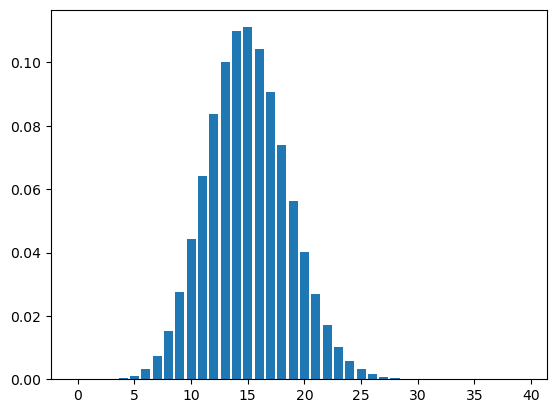

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

num_trials, p_elixir = 100, 0.15
elix_distribution = stats.binom(num_trials, p_elixir)
possible_elix = list(range(0,40))
plt.bar(possible_elix,
        elix_distribution.pmf(possible_elix))

## Q1 Ans: They are expected to get 15 elixirs on average. However, we can't say for certain how many elixir they will get per 100 loot box. As some can be lucky and get more than 15, and some may be unlucky and get less than 15.

#### 2. Our boss asks, "How many loot boxes does someone have to purchase in order to definitely get elixir?" How would you respond?

**NOTE**: When your Jupyter notebook is open, double-click on this Markdown cell! You can delete this text and put your answer to the previous problem in here.

## Q2 Ans: If the person is very unlucky, then he may not get any elixir no matter how many loot box he purchase. So we can't guarantee the person will defintely get elixir. We can only say how likely the person can get the elixir after purchasing certain number of loot box. The person becomes very likely to get an elixir after 30 tries.

array([8.74767363e-08, 1.63118385e-06, 1.51159195e-05, 9.28514544e-05,
       4.25513817e-04, 1.55265218e-03, 4.70200935e-03, 1.21651919e-02,
       2.74756914e-02, 5.50946317e-02, 9.94474005e-02, 1.63486158e-01,
       2.47301590e-01, 3.47425002e-01, 4.57224206e-01, 5.68315165e-01,
       6.72462940e-01, 7.63276916e-01, 8.37174563e-01, 8.93455744e-01,
       9.33680234e-01, 9.60721909e-01, 9.77857943e-01, 9.88113268e-01,
       9.93919591e-01, 9.97034513e-01, 9.98620164e-01, 9.99387079e-01,
       9.99739925e-01, 9.99894519e-01, 9.99959084e-01, 9.99984813e-01,
       9.99994603e-01, 9.99998163e-01, 9.99999400e-01, 9.99999812e-01,
       9.99999944e-01, 9.99999984e-01, 9.99999996e-01, 9.99999999e-01])

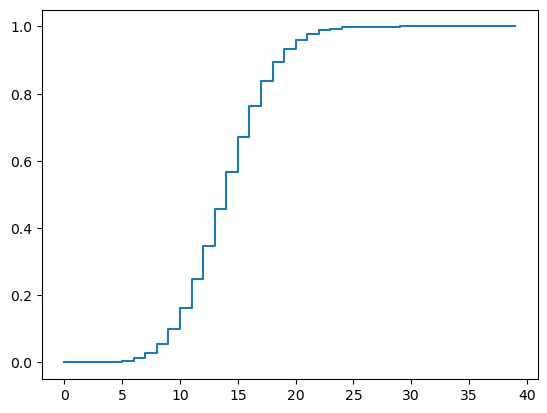

In [2]:
plt.step(possible_elix,
         elix_distribution.cdf(possible_elix))

elix_distribution.cdf(possible_elix)

#### 3. Our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets more than 20 elixirs?" This is a bit more complicated, so let's break it down before answering.

#### 3a. Let's suppose my random variable $X$ counts up how many elixirs I observe out of my 100 loot boxes. Why is $X$ a discrete random variable?

**NOTE**: When your Jupyter notebook is open, double-click on this Markdown cell! You can delete this text and put your answer to the previous problem in here.

## Q3a Ans: We can count the number of outcomes from opening the loot box. Since we can count the number of possible outcomes as X can take the value 100, X is a discerte random variable.

#### 3b. Recall our discrete distributions: discrete uniform, Bernoulli, binomial, Poisson. Let's suppose my random variable $X$ counts up how many elixirs I observe out of my 100 loot boxes. What distribution is best suited for $X$? Why?
- Hint: It may help to consider getting the magical elixir a "success" and getting nothing a "failure." 

**NOTE**: When your Jupyter notebook is open, double-click on this Markdown cell! You can delete this text and put your answer to the previous problem in here.

## Q3b Ans: Binomial distribution. This is becasue we have n trials where n = 100. We have probability of sucess (getting an elixir) of 0.15. This fits binomial distribution best.

#### 3c. Our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets more than 20 elixirs?" Use the probability mass function to answer the boss' question.

In [8]:
# Show your work; leave your answer in a comment.
total_p = 0
for i in range(21): #loop from 0 to 20
    total_p += elix_distribution.pmf(i) #calculate probability of user getting 0 to 20 elixir.

1 - total_p # 1 - P(X<=20), result in P(X>20)

0.06631976581888166

## Q3c Ans: 6.6% probability user will get 20 elxir or more from 100 loot boxes.

#### 3d. Our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets more than 20 elixirs?" Use the cumulative distribution function to answer the boss' question.

In [10]:
# Show your work; leave your answer in a comment.
1 - elix_distribution.cdf(20) #1 - the probability that user will get 0 to 20 elixir

0.06631976581888166

## Q3d Ans: 6.6% probability user will get 20 elxir or more from 100 loot boxes.

#### 3e. Our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets more than 20 elixirs?" Answer your boss' question. *Remember that your boss is not a math-y person!*

In [ ]:
# 6.6%

#### 4. Your boss wants to know how many people purchased how many loot boxes last month. 
> For example, last month, 70% of users did not purchase any loot boxes. 10% of people purchased one loot box. 5% of people purchased two loot boxes... and so on.

#### 4a. Recall our discrete distributions: discrete uniform, Bernoulli, binomial, Poisson. Let's suppose my random variable $Y$ counts up how many loot boxes each person purchased through the game last month. What distribution is best suited for $Y$? Why?

**NOTE**: When your Jupyter notebook is open, double-click on this Markdown cell! You can delete this text and put your answer to the previous problem in here.

## Q4a Ans: Poisson distribution. This is because it is the number of occurance (getting loot boxes) in a set period of time (1 month). Poisson distribution fits this best.

#### 4b. Suppose that, on average, your customers purchased 2.7 loot boxes last month. In order for your revenue to be at least $500,000, at least how many users would you need on your platform? (Round your answer up to the nearest thousand.) 

In [12]:
# Show your work; leave your answer in a comment.
import math
person = math.ceil(500000/(1000*2.7))*1000
person

186000

## Q4b Ans: 186000 users are needed to generate a revenue of at least $500000

#### 4c. Assume that your platform has the numer of users you mentioned in your last answer. Suppose that your platform calls anyone who purchases 5 or more loot boxes in a month a "high value user." How much money do you expect to have earned from "high value users?" How about "low value users?"

In [14]:
# Show your work; leave your answer in a comment.
low_earn = 0
for i in range(5): #loop through 0 to 4
    low_earn += i * 186000 * stats.poisson(2.7).pmf(i) #find total ammount earned from user who purchased 0 to 4 loot boxes
    # i: money spent on loot boxes.   186000 * stats.poisson(2.7).pmf(i): number of person purchasing i number of loot boxes.
print(low_earn) #low value
print((2.7 * 186000) - low_earn) #money earned from the remianing users, who purchase 5 or more loot boxes

358617.0905944612
143582.90940553887


## Q4c Ans: We are expected to make 358617 dollars form low value users and make 143583 dollars from high value users.

#### 4d. Suppose that you want to summarize how many people purchased how many loot boxes last month for your boss. Since your boss isn't math-y, what are 2-4 summary numbers you might use to summarize this for your boss? (Your answers will vary here - use your judgment!)

Q4d Ans: 1. Number of users who purchased at least 1 loot box. 2. Number loot box sold. 3. Average number of loot box perchased by all users. 4. Average number of loot boxes purchased by paying users.

#### 5. Your boss asks "How many loot boxes does it take before someone gets their first elixir?" Using `np.random.choice`, simulate how many loot boxes it takes somone to get their first elixir. 
- Start an empty list.
- Use control flow to have someone open loot boxes repeatedly.
- Once they open a loot box containing an elixir, record the number of loot boxes it took in the empty list.
- Repeat this process 100,000 times. 

This simulates how long it takes for someone to open a loot box containing elixir. Share the 5th, 25th, 50th, 75th, and 95th percentiles.

> You may find [this documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.choice.html)  and [this documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.percentile.html) helpful.

In [16]:
gets_elix = []
outcome = ["elix","nothing"]

for i in range(100_000):
    tries = 0
    while True:
        open_result = np.random.choice(outcome, p = [0.15, 0.85])
        tries += 1
        if open_result == "elix":
            gets_elix.append(tries)
            break

In [18]:
print(f'The 5th percentile of how many tries it takes to find elixir is {np.percentile(gets_elix, 5)}')
print(f'The 25th percentile of how many tries it takes to find elixir is {np.percentile(gets_elix, 25)}')
print(f'The 50th percentile of how many tries it takes to find elixir is {np.percentile(gets_elix, 50)}')
print(f'The 75th percentile of how many tries it takes to find elixir is {np.percentile(gets_elix, 75)}')
print(f'The 95th percentile of how many tries it takes to find elixir is {np.percentile(gets_elix, 95)}')

The 5th percentile of how many tries it takes to find elixir is 1.0
The 25th percentile of how many tries it takes to find elixir is 2.0
The 50th percentile of how many tries it takes to find elixir is 5.0
The 75th percentile of how many tries it takes to find elixir is 9.0
The 95th percentile of how many tries it takes to find elixir is 19.0


**NOTE**: When your Jupyter notebook is open, double-click on this Markdown cell! You can delete this text and put your answer to the previous problem in here.

### Version 2

After a substantial update to the game, suppose every loot box can be opened to reveal *one of four different* items:
- magical elixir (occurs 1% of the time, most valuable)
- golden pendant (occurs 9% of the time, valuable)
- steel armor (occurs 30% of the time, semi-valuable)
- bronze coin (occurs 60% of the time, least valuable)

#### 6. Suppose you want repeat problem 5 above, but do that for the version 2 loot boxes so you can track how many loot boxes are needed to get each item? (e.g. You'd like to be able to say that on average it takes 10 trials to get a golden pendant, 3 trials to get steel armor, and so on.) What Python datatype is the best way to store this data? Why?

Q6 Ans: Dictionary. We can use the name of item as key and average number of loot box opened to get an item as value.

#### 7. Suppose you and your boss want to measure whether "Version 2" is better than "Version 1." What metrics do you think are important to measure? (Your answers will vary here - use your judgment!)

Q7 Ans: 1. Revenue earned 2. Number of players needed hit $500,000 3. Number of players who paid for loot boxes 4. Average time player spend in game